# SQL Practice

![](https://storage.googleapis.com/kaggle-datasets-images/55151/105464/d59245a7014a35a35cc7f7b721de4dae/dataset-cover.png?t=2018-09-21-16-21-21)

The session today will be around the __Brazillian E-commerce__ dataset (Source: [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce)). In the first part of the session, you will be tasked to __write SQL queries to answer the given questions__. The second part will be a __Mini Hackathon__ where you are going to __analyze a specific topic about the dataset__.

You should have the access to the dataset by now. But if you don't, please contact us asap! Click the link below to nagivate to BigQuery.

> __[Brazillian E-commerce Dataset - BigQuery](https://console.cloud.google.com/bigquery?project=ftmle-sql-test&p=ftmle-sql-test&d=e_commerce&page=dataset)__


## Queries
![](https://i.imgur.com/eexU6b5.png)

Here are the SQL query syntax (with examples) for BigQuery:

https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax


Working with Date Function:
https://cloud.google.com/bigquery/docs/reference/standard-sql/date_functions

Set Operators:
https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax#set_operators

### 0. Query the first 10 rows of `products` table

```sql
-- Paste your query here

SELECT * FROM e_commerce.products LIMIT 10
```

Some useful query to get you started

```sql
-- Returns metadata for tables in a single dataset.
SELECT * FROM mydataset.INFORMATION_SCHEMA.TABLES;
```

```sql
-- Get column name and column type for a given table
SELECT column_name, data_type
FROM mydataset.INFORMATION_SCHEMA.COLUMNS
WHERE table_name = 'mytable'
```

### 1. Query the top 10 categories (using their english names) having the most number of product on this E-commerce Site.

In [ ]:
SELECT c.category_name_english, 
    COUNT(c.category_name_english) AS Frequency
    FROM e_commerce.products AS p
JOIN e_commerce.category_name_translation AS c
    ON p.product_category_name = c.category_name
GROUP BY c.category_name_english
ORDER BY Frequency DESC
LIMIT 10

Expected answer:

![](https://i.imgur.com/zAOeQ0r.png)

### 2. Query the number of late and on-time orders delivered to customers

Note: use order_estimated_delivery_date (estimate date to deliver) and order_delivered_customer_date (the date the order is actually delivered) to determine whether an order is late or on-time. Be aware that there can be rows with 'delivered' status without a delivery date, so make sure to not include them. And an order delivered at 2021-04-20 16:00:00 when the estimated delivery date is 2021-04-20 is still NOT late (still the same date)

In [ ]:
WITH order_lateness AS
    (SELECT order_id, 
        order_delivered_carrier_date, 
        order_estimated_delivery_date,
        CASE
            WHEN DATE(order_delivered_customer_date) > DATE(order_estimated_delivery_date) THEN "late"
            WHEN DATE(order_delivered_customer_date) <= DATE(order_estimated_delivery_date) THEN "on_time"
        END AS delivery_status
        FROM e_commerce.orders
    WHERE order_delivered_customer_date IS NOT null AND order_status = "delivered")

SELECT delivery_status, COUNT(delivery_status) AS total FROM order_lateness
GROUP BY delivery_status

### 3. Query top 5 seller_id by the total value of orders delivered to customers in the first quarter of 2017.
Note: An `order_id` might have multiple products, and value of an order can be calculated by taking price of the items + freight value (shipping price)

In [ ]:
SELECT i.seller_id, SUM(i.price + i.freight_value) AS total_value
    FROM e_commerce.orders AS o
JOIN e_commerce.order_items AS i
    ON i.order_id = o.order_id
WHERE 
    order_status = "delivered"
    AND DATE(order_delivered_customer_date) >= DATE("2017-01-01")
    AND DATE(order_delivered_customer_date) < DATE("2017-04-01")
GROUP BY i.seller_id
ORDER BY total_value DESC
LIMIT 5

### 4. (Challenge) Find the number of orders that have the following exact payment sequence: credit_card - voucher - voucher
Each order can have multiple payments. We want to query the orders which have the first payment (`payment_sequential` = 1) made using __credit_card__, the second and the third using __voucher__.


In [ ]:
SELECT COUNT(*) AS qualified_orders FROM
(
    SELECT order_id FROM e_commerce.order_payments
    WHERE payment_sequential = 1 AND payment_type LIKE "credit_card"

    INTERSECT DISTINCT 

    SELECT order_id FROM e_commerce.order_payments
    WHERE payment_sequential = 2 AND payment_type LIKE "voucher"

    INTERSECT DISTINCT 

    SELECT order_id FROM e_commerce.order_payments
    WHERE payment_sequential = 3 AND payment_type LIKE "voucher"
)

Expected answer: 373

## SQL Hackathon

![](https://techvccloud.mediacdn.vn/zoom/650_406/2018/12/22/1supq92uyknelefyyf7ughw-15454498606631836572894-crop-1545449864895548482406.png)

Each team will be assigned with one topic about the __Brazillian E-commerce Dataset__. Your task is to use BigQuery and Google Data Studio to conduct analysis on the given topic!

You will need to first write SQL queries to extract the data that you want to analyze, then use the __Explore Data__ feature on Big Query to visualize your findings on Google Data Studio.

In the end of the day, each team will present their works to the class. The winner team will get __5 points / member__, the runner-up and second runner-up will get __3 points / member__ and the rest will get __2 points / member__.

The following section contains the list of topics and some suggestions. 

Note: You are highly encouraged to extend your analysis beyond the suggestions if you want to have a shoot at winning the Hackathon!

In [ ]:
import numpy as np

np.random.permutation(2)+1


Team 1: Orders

Team 2: Sellers

Team 3: Products

Team 4: Sellers

Team 5: Orders

Team 6: Customer

Team 7: Reviews


### Topic 1: Customers
You are required to present __an overview of the customer profile and their behaviour__.

You might look into the following aspects:
- Where are they from? Is there any difference between customers coming from different cities/states?
- Who are the biggest customers? What is their buying behaviour (payments, favorite categories, seasonality...)
- Any recommendation?

### Topic 2: Orders

You are required to present __an analysis of the orders made on the e-commerce site__. This topic focuses more on the operation of the e-commerce site.

You might look into the following aspects:
- How long does it take to process the orders? Is delay/lateness a common issue? If there is, can you figure out why?
- What are the payment options? Look deeper into each option to see if there is any interesting insight/pattern? 
- Any recommendation?

### Topic 3: Products

You are required to present __an analysis on the products being sold on the e-commerce site__.

You might look into the following aspects:
- What are the top categories (in term of revenue/review/...)? Is there any underlying reason that makes those categories popular? 
- Do the product attributes (size, dimensions,...) affect the success of that product? 
- Any recommendation?

### Topic 4: Reviews

You are required to present __an analysis on the order reviews__.

You might look into the following aspects:
- How is the overall review? How is the review between different aspects (category, city/state,...)?
- Can you identify any underlying reason behind good/bad reviews? I.e. correlation between review score and other factors.
- Any recommendation?

### Topic 5: Sellers

You are required to present __and overview of seller profile and their performance__.

You might look into the following aspects:
- Where are the sellers from? Is there any difference between sellers from different cities/states?
- What make a seller successsful? What sellers are performing well / badly?
- Any recommendation?

In [ ]:
#TO CHECK #customer #table
# check if each customer_unique_id has many different customer_id -> True
SELECT COUNT(customer_id) AS frequency, customer_unique_id FROM e_commerce.customers
GROUP BY customer_unique_id
ORDER BY frequency DESC
LIMIT 10

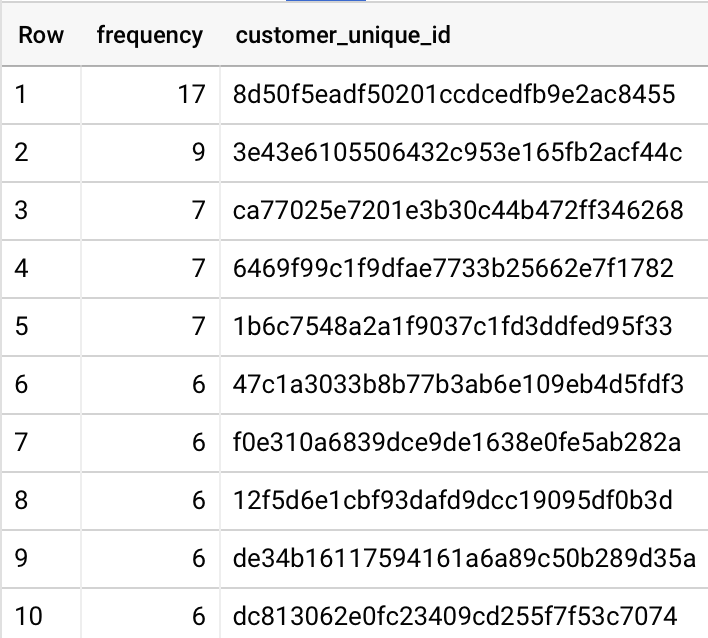

In [ ]:
# Who spent the most by living city?
WITH customer_payment AS
(
SELECT c.customer_id, c.customer_unique_id, c.customer_city, o.order_id, p.payment_type, p. payment_installments, p.payment_value
    FROM e_commerce.orders AS o
JOIN e_commerce.customers AS c
    ON o.customer_id = c.customer_id
JOIN e_commerce.order_payments AS p
    ON o.order_id = p.order_id
ORDER BY c.customer_id DESC
),

highest_expense_customers AS
(
SELECT customer_unique_id, SUM(payment_value) AS total_payment
    FROM customer_payment
GROUP BY customer_unique_id
ORDER BY total_payment DESC
)

SELECT h.customer_unique_id, h.total_payment, cp.customer_city FROM highest_expense_customers AS h
JOIN customer_payment AS cp ON h.customer_unique_id = cp.customer_unique_id
ORDER BY h.total_payment DESC

In [ ]:
# Classify customers to put them into different classes of customers basing payment value

In [ ]:
# Which is the most favorite payment_type?
SELECT *, ROUND((frequency/all_payments*100),1) AS percentage FROM 
(
SELECT payment_type, COUNT(order_id) AS frequency, 103886 AS all_payments
    FROM `ftmle-sql-test.e_commerce.order_payments`
GROUP BY payment_type
ORDER BY frequency DESC
)

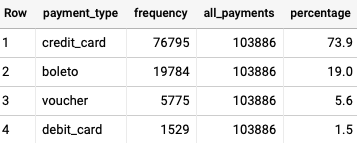

In [ ]:
# How would customers prefer payment_installments?

SELECT *, ROUND((frequency/all_payments*100),1) AS percentage,
    CASE
        WHEN payment_installments = 1 THEN "one time payment"
        WHEN payment_installments > 1 THEN "installment payment"
    END AS payment_type
    FROM 
        (
            SELECT payment_installments, COUNT(order_id) AS frequency, 103886 AS all_payments
                FROM `ftmle-sql-test.e_commerce.order_payments`
            GROUP BY payment_installments
            HAVING payment_installments > 0
        )
ORDER BY percentage DESC


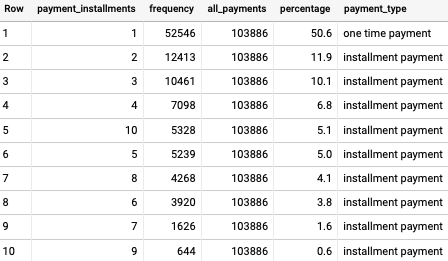

In [ ]:
#Find average customer payment
WITH cleaned_order_payments AS
(
    SELECT order_id, ROUND(SUM(payment_value),2) AS payment_value_per_order FROM e_commerce.order_payments
    GROUP BY order_id
)

SELECT  c_o_p.order_id, payment_value_per_order, c.customer_unique_id, c.customer_city
    FROM cleaned_order_payments AS c_o_p
JOIN e_commerce.orders AS o
    ON c_o_p.order_id = o.order_id
JOIN e_commerce.customers AS c
    ON o.customer_id = c.customer_id

In [ ]:
# Find total expense, total customers and average expense per customer by cities

WITH total_customer_by_city AS
(
SELECT COUNT(DISTINCT customer_unique_id) AS number_of_customers, customer_city
    FROM e_commerce.customers
GROUP BY customer_city
),

customer_payment AS
(
SELECT c.customer_id, c.customer_unique_id, c.customer_city, o.order_id, p.payment_type, p. payment_installments, p.payment_value
    FROM e_commerce.orders AS o
JOIN e_commerce.customers AS c
    ON o.customer_id = c.customer_id
JOIN e_commerce.order_payments AS p
    ON o.order_id = p.order_id
),

customer_total_payment AS 
(
SELECT customer_city, SUM(payment_value) AS total_payment
    FROM customer_payment
GROUP BY customer_city
)

SELECT cp.customer_city, ROUND(cp.total_payment,2), cc.number_of_customers, ROUND((cp.total_payment/cc.number_of_customers),2) AS average_expense_per_customer
    FROM customer_total_payment AS cp 
JOIN total_customer_by_city AS cc 
    ON cp.customer_city = cc.customer_city
ORDER BY cp.total_payment DESC


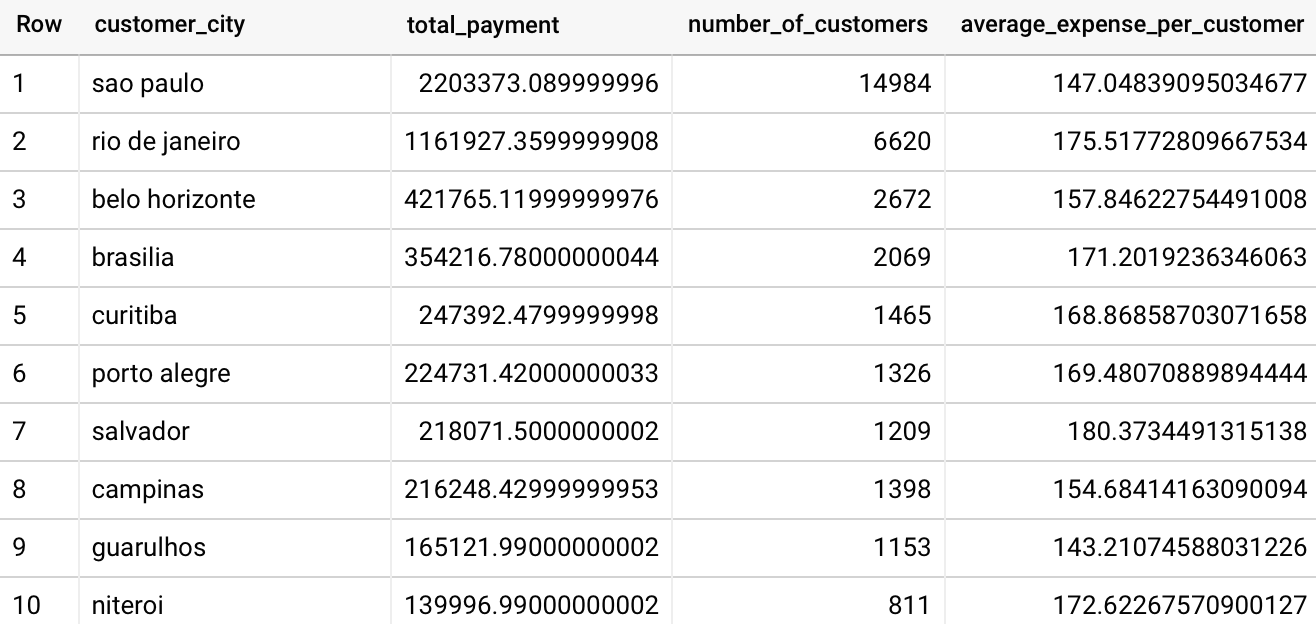

In [ ]:
#TO CHECK #order_items #table
# product_id has multiple order_id where order_item_id is labeled inside every individual order_id
SELECT order_item_id, order_id, product_id, price, shipping_limit_date FROM e_commerce.order_items
WHERE order_id LIKE "8272b63d03f5f79c56e9e4120aec44ef"
ORDER BY order_item_id ASC

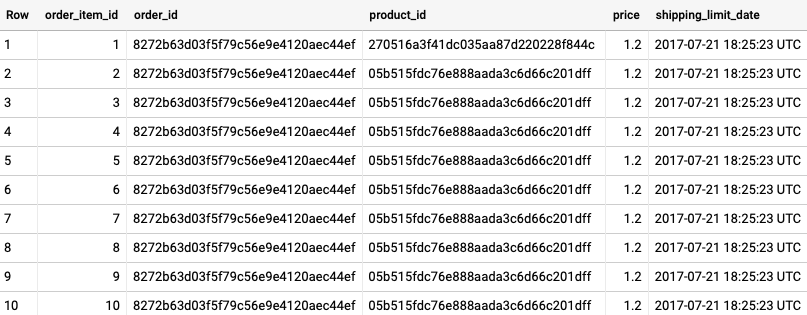

In [ ]:
# Find the #total_order_value and #total_order in each #product_category
WITH total_order_value_by_category AS
(
SELECT tr.category_name_english AS product_category, ROUND(SUM(o_i.price),2) AS total_order_value
    FROM e_commerce.products AS p
JOIN e_commerce.category_name_translation AS tr
    ON p.product_category_name = tr.category_name
JOIN e_commerce.order_items AS o_i
    ON o_i.product_id = p.product_id
GROUP BY tr.category_name_english
ORDER BY total_order_value DESC
),

total_order_by_category AS
(
SELECT tr.category_name_english AS product_category, COUNT(o_i.order_id) AS total_order
    FROM e_commerce.products AS p
JOIN e_commerce.category_name_translation AS tr
    ON p.product_category_name = tr.category_name
JOIN e_commerce.order_items AS o_i
    ON o_i.product_id = p.product_id
GROUP BY product_category
ORDER BY total_order DESC
)

SELECT total_order_value_by_category.product_category, total_order, total_order_value FROM total_order_value_by_category
JOIN total_order_by_category 
    ON total_order_value_by_category.product_category = total_order_by_category.product_category
ORDER BY total_order_value DESC

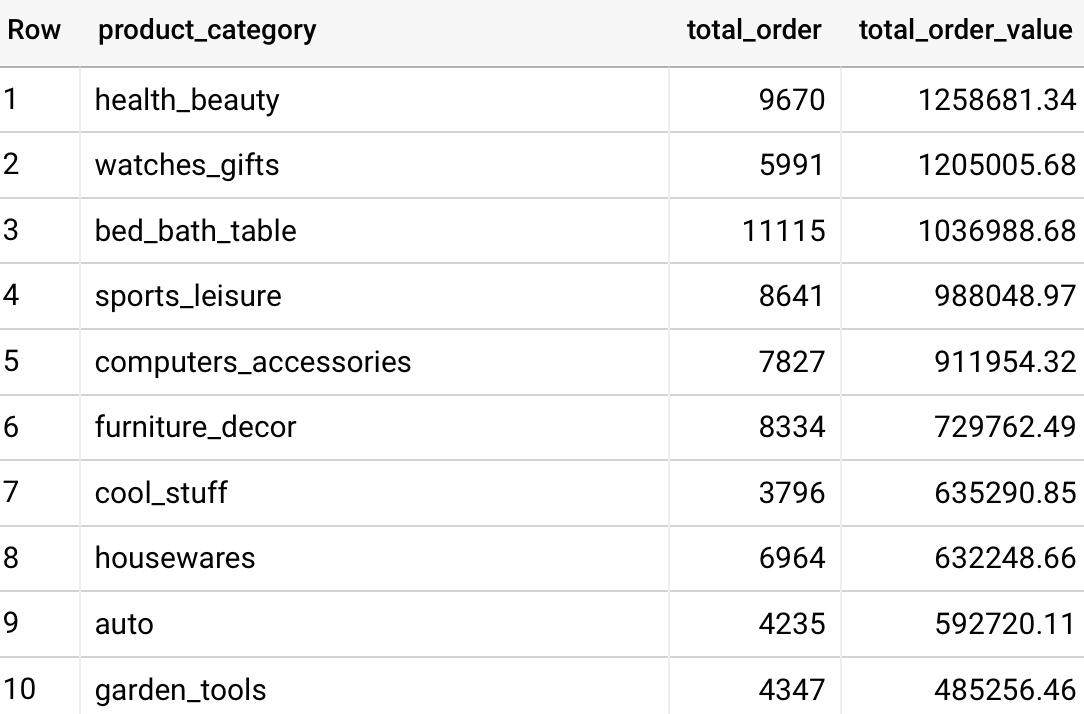

In [ ]:
# Find the #total_selling_price in each #product_category by #purchased_year
WITH product_info AS
(
SELECT o_i.order_id, p.product_id, tr.category_name_english AS product_category, o_i.price
    FROM e_commerce.products AS p
JOIN e_commerce.category_name_translation AS tr
    ON p.product_category_name = tr.category_name
JOIN e_commerce.order_items AS o_i
    ON o_i.product_id = p.product_id
),

order_info AS
(
SELECT o.order_id, product_id, product_category, price,
    EXTRACT(MONTH FROM o.order_purchase_timestamp) AS purchased_month,
    EXTRACT(YEAR FROM o.order_purchase_timestamp) AS purchased_year,
    FROM e_commerce.orders AS o
JOIN product_info ON o.order_id = product_info.order_id
),

total_sales_2016 AS
(
SELECT product_category, ROUND(SUM(price),2) AS total_selling_value_2016
    FROM order_info
WHERE purchased_year = 2016
GROUP BY product_category
),

total_sales_2017 AS
(
SELECT product_category, ROUND(SUM(price),2) AS total_selling_value_2017
    FROM order_info
WHERE purchased_year = 2017
GROUP BY product_category
),

total_sales_2018 AS
(
SELECT product_category, ROUND(SUM(price),2) AS total_selling_value_2018
    FROM order_info
WHERE purchased_year = 2018
GROUP BY product_category
)

SELECT s17.product_category, s16.total_selling_value_2016, s17.total_selling_value_2017, s18.total_selling_value_2018
    FROM total_sales_2017 AS s17
FULL OUTER JOIN total_sales_2016 AS s16
    ON s17.product_category = s16.product_category
FULL OUTER JOIN total_sales_2018 AS s18
    ON s17.product_category = s18.product_category
ORDER BY total_selling_value_2017 DESC

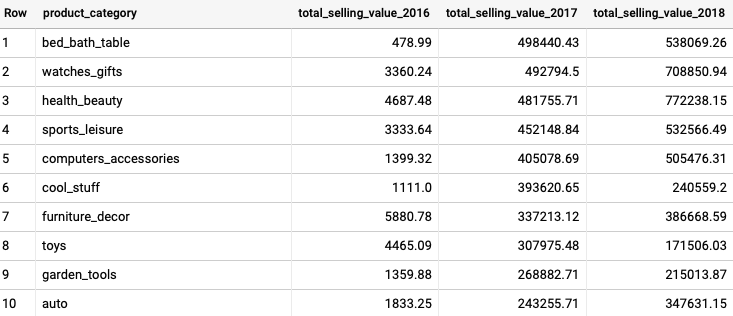

In [ ]:
# Find the #total_selling_price in each #product_category by quarters
WITH product_info AS
(
    SELECT o_i.order_id, p.product_id, tr.category_name_english AS product_category, o_i.price
        FROM e_commerce.products AS p
    JOIN e_commerce.category_name_translation AS tr
        ON p.product_category_name = tr.category_name
    JOIN e_commerce.order_items AS o_i
        ON o_i.product_id = p.product_id
),

order_info AS
(
    SELECT o.order_id, product_id, product_category, price,
        EXTRACT(MONTH FROM o.order_purchase_timestamp) AS purchased_month,
        EXTRACT(YEAR FROM o.order_purchase_timestamp) AS purchased_year,
        FROM e_commerce.orders AS o
    JOIN product_info ON o.order_id = product_info.order_id
),

total_sales AS
(
    SELECT tr.category_name_english AS product_category, ROUND(SUM(o_i.price),2) AS total_selling_value
        FROM e_commerce.products AS p
    JOIN e_commerce.category_name_translation AS tr
        ON p.product_category_name = tr.category_name
    JOIN e_commerce.order_items AS o_i
        ON o_i.product_id = p.product_id
    GROUP BY tr.category_name_english
    ORDER BY total_selling_value DESC
),

Q4_2016_sales AS
( 
    SELECT total_sales.product_category, total_selling_value_Q4_2016 FROM total_sales 
    FULL OUTER JOIN
        (
                SELECT product_category, ROUND(SUM(price),2) AS total_selling_value_Q4_2016 FROM order_info
                WHERE purchased_year = 2016
                GROUP BY product_category
        ) AS Q4_16
        ON total_sales.product_category = Q4_16.product_category
),

Q1_2017_sales AS
( 
    SELECT total_sales.product_category, total_selling_value_Q1_2017 FROM total_sales 
    FULL OUTER JOIN
        (
                SELECT product_category, ROUND(SUM(price),2) AS total_selling_value_Q1_2017 FROM order_info
                WHERE purchased_year = 2017 AND (purchased_month = 1 OR purchased_month = 2 OR purchased_month = 3)
                GROUP BY product_category
        ) AS Q1_17
        ON total_sales.product_category = Q1_17.product_category
),

Q2_2017_sales AS
(
    SELECT total_sales.product_category, total_selling_value_Q2_2017 FROM total_sales 
    FULL OUTER JOIN
        (
                SELECT product_category, ROUND(SUM(price),2) AS total_selling_value_Q2_2017 FROM order_info
                WHERE purchased_year = 2017 AND (purchased_month = 4 OR purchased_month = 5 OR purchased_month = 6)
                GROUP BY product_category
        ) AS Q2_17
        ON total_sales.product_category = Q2_17.product_category
),

Q3_2017_sales AS
(
    SELECT total_sales.product_category, total_selling_value_Q3_2017 FROM total_sales 
    FULL OUTER JOIN
        (
                SELECT product_category, ROUND(SUM(price),2) AS total_selling_value_Q3_2017 FROM order_info
                WHERE purchased_year = 2017 AND (purchased_month = 7 OR purchased_month = 8 OR purchased_month = 9)
                GROUP BY product_category
        ) AS Q3_17
        ON total_sales.product_category = Q3_17.product_category
),

Q4_2017_sales AS
(
    SELECT total_sales.product_category, total_selling_value_Q4_2017 FROM total_sales 
    FULL OUTER JOIN
        (
                SELECT product_category, ROUND(SUM(price),2) AS total_selling_value_Q4_2017 FROM order_info
                WHERE purchased_year = 2017 AND (purchased_month = 10 OR purchased_month = 11 OR purchased_month = 12)
                GROUP BY product_category
        ) AS Q4_17
        ON total_sales.product_category = Q4_17.product_category
),

sales_2017 AS
(
    SELECT Q3_17.product_category, Q1_17.total_selling_value_Q1_2017, Q2_17.total_selling_value_Q2_2017, Q3_17.total_selling_value_Q3_2017, Q4_17.total_selling_value_Q4_2017
        FROM Q3_2017_sales AS Q3_17
    JOIN Q4_2017_sales AS Q4_17 
        ON Q3_17.product_category = Q4_17.product_category
    JOIN Q1_2017_sales AS Q1_17 
        ON Q1_17.product_category = Q3_17.product_category
    JOIN Q2_2017_sales AS Q2_17 
        ON Q3_17.product_category = Q2_17.product_category
),

Q1_2018_sales AS
( 
    SELECT total_sales.product_category, total_selling_value_Q1_2018 FROM total_sales 
    FULL OUTER JOIN
        (
                SELECT product_category, ROUND(SUM(price),2) AS total_selling_value_Q1_2018 FROM order_info
                WHERE purchased_year = 2018 AND (purchased_month = 1 OR purchased_month = 2 OR purchased_month = 3)
                GROUP BY product_category
        ) AS Q1_18
        ON total_sales.product_category = Q1_18.product_category
),

Q2_2018_sales AS
(
    SELECT total_sales.product_category, total_selling_value_Q2_2018 FROM total_sales 
    FULL OUTER JOIN
        (
                SELECT product_category, ROUND(SUM(price),2) AS total_selling_value_Q2_2018 FROM order_info
                WHERE purchased_year = 2018 AND (purchased_month = 4 OR purchased_month = 5 OR purchased_month = 6)
                GROUP BY product_category
        ) AS Q2_18
        ON total_sales.product_category = Q2_18.product_category
),

Q3_2018_sales AS
(
    SELECT total_sales.product_category, total_selling_value_Q3_2018 FROM total_sales 
    FULL OUTER JOIN
        (
                SELECT product_category, ROUND(SUM(price),2) AS total_selling_value_Q3_2018 FROM order_info
                WHERE purchased_year = 2018 AND (purchased_month = 7 OR purchased_month = 8 OR purchased_month = 9)
                GROUP BY product_category
        ) AS Q3_18
        ON total_sales.product_category = Q3_18.product_category
),

sales_2018 AS
(
    SELECT Q2_18.product_category, Q1_18.total_selling_value_Q1_2018, Q2_18.total_selling_value_Q2_2018, Q3_18.total_selling_value_Q3_2018
        FROM Q2_2018_sales AS Q2_18
    JOIN Q1_2018_sales AS Q1_18 
        ON Q1_18.product_category = Q2_18.product_category
    JOIN Q3_2018_sales AS Q3_18 
        ON Q3_18.product_category = Q2_18.product_category
        ORDER BY Q2_18.total_selling_value_Q2_2018 DESC
)

SELECT  sales_2017.product_category, 
        Q4_2016_sales.total_selling_value_Q4_2016,
        total_selling_value_Q1_2017, total_selling_value_Q2_2017, total_selling_value_Q3_2017, total_selling_value_Q4_2017, 
        total_selling_value_Q1_2018, total_selling_value_Q2_2018, total_selling_value_Q3_2018,
        total_selling_value
    FROM sales_2018
JOIN sales_2017 ON sales_2017.product_category = sales_2018.product_category
JOIN Q4_2016_sales ON Q4_2016_sales.product_category = sales_2018.product_category
JOIN total_sales ON total_sales.product_category = sales_2018.product_category
ORDER BY total_selling_value DESC

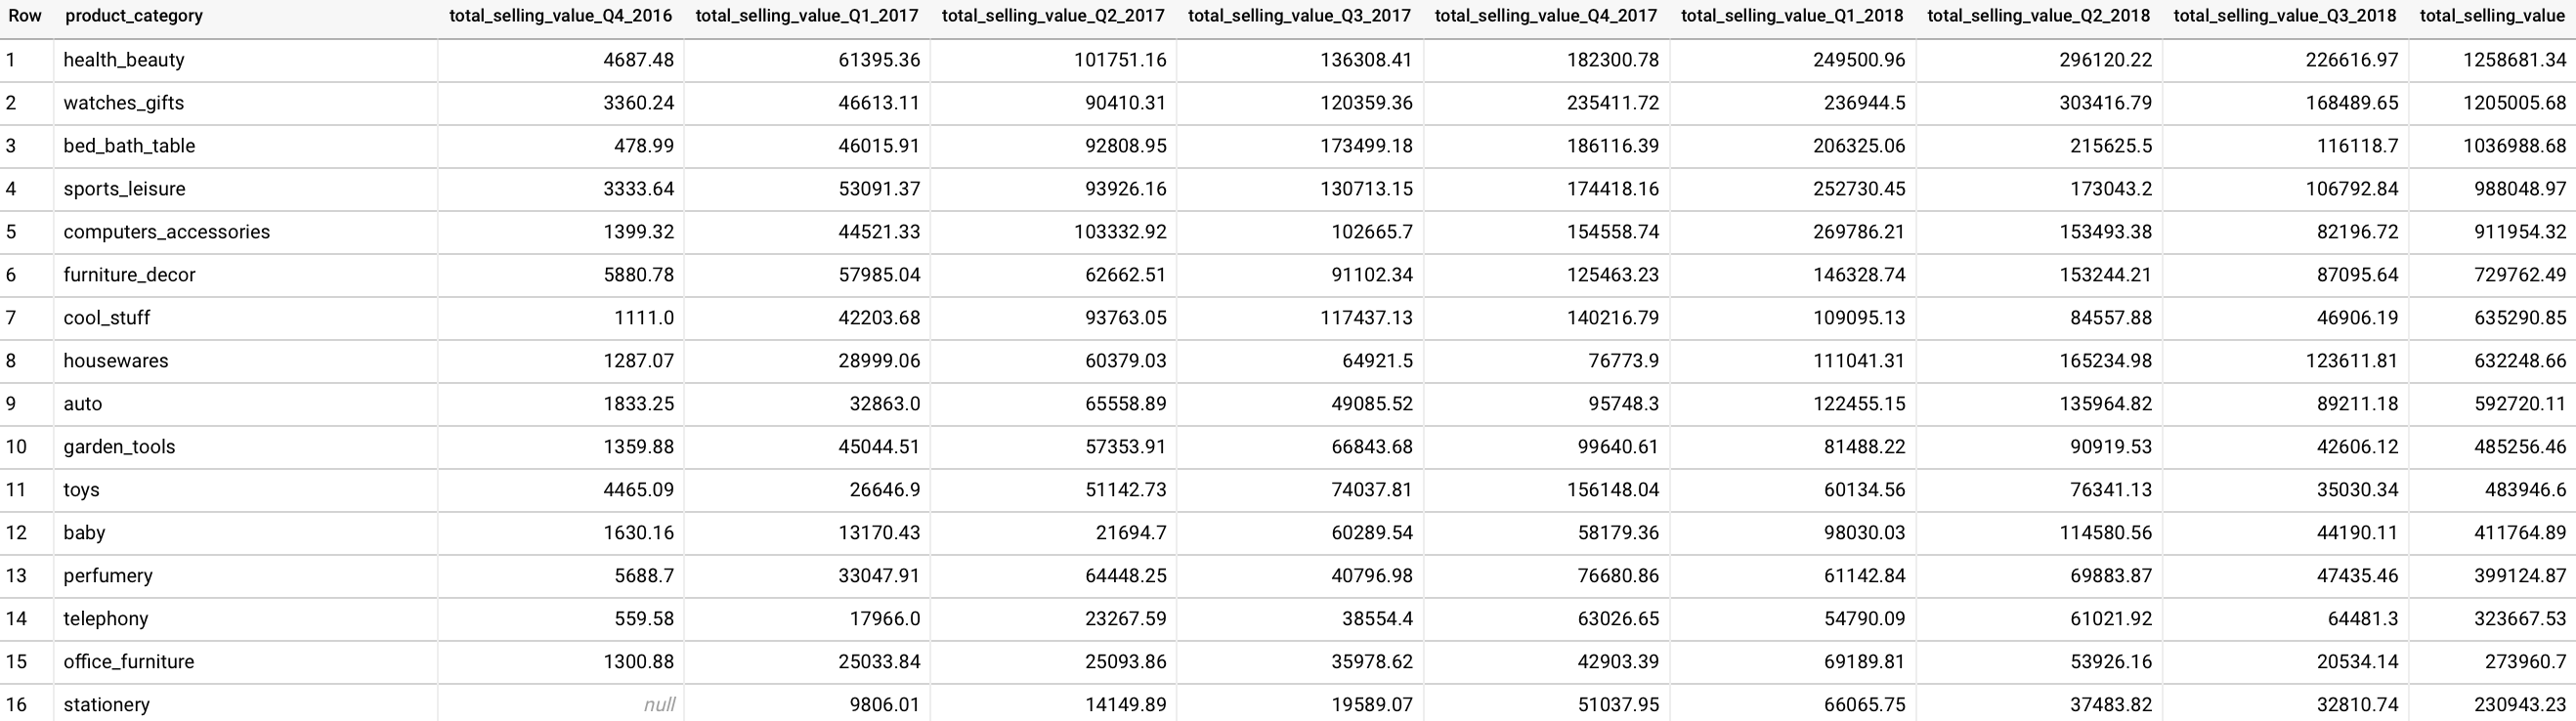